# Single cell rna sequencing : новый этап в исследованиях работы генов?  
Этот семинар расскажет, что такое секвенирование РНК, почему секвенирование отдельных клеток это лучше, чем всех сразу вместе, как такие данные обрабатывать и почему это бывает сложно 

### Немного биологии

Начнем с центральной догмы молекулярной биологии. У нас есть ДНК, есть процесс транскрипции, который переводит информацию с ДНК, далее идет процесс трансляции, который переводит РНК в соответствующий белок.

<img src="images/molecular_dogma.jpeg" title="The Central Dogma of Molecular Biology, ib.bioninja.com.au" alt="The Central Dogma of Molecular Biology, ib.bioninja.com.au" >  

*Понятно, что это лишь первое приближение процессов. Мы можем так же говорить про альтернативный сплайсинг, РНК интерференцию, пост-транкприционные модификации, пост-трансляционные модификации и так далее, но тут это не очень важно*

За редким исключением основную функцию несут белки - именно они являются теми молекулярными машинами, которые делают всю грязную работу в клетках, но наши технологии не очень рассчитаны на прочтение последовательностей белков (масс спектроскопия), но мы отлично можем читать последовательности РНК\ДНК. Поэтому мы считаем, что если определенная РНК есть в клетке, то там будет и белок, который будет выполнять какую-то функцию. Это, впрочем, не всегда верно, но что делать. 

Как следует из имени, РНК секвенирование - это группа методов для количественного анализа количества РНК в образце. Причина, по котороый мы хотим оценить количество РНК, заключается в том, что разные клетки могут экспрессировать разные гены (и даже в разный момент времени), а следовательно, выполнять различные функции. Типичное использование РНК секвенирования заключается в том, чтобы оценить различие экспресси генов в двух группах, например, в клетках, которые были подвержены действию лекарства, и в клетках, которые никто не трогал. Например, у нас есть N образцов в одной группе, N образцов в другой группе и мы хотим понять, какие гены дифференциально экспресируются (=среднее значение экспрессии в группах различно). Другой пример использование, это влияние определенных мутаций на уровень экспресси генов. 

Однако эти методы имеют свои ограничения, так как мы извлекаем и секвенируем РНК из группы клеток, мы теряем всю информцию о разнице между ними и измеряем средний уровень. В определенных случаях это может быть так же полезно, как средняя температура во всей больнице - да, это число, но что оно значит? 

<img src="images/single_cell.jpeg" title="source hemberg-lab.github.io/scRNA.seq.course" alt="Tsource hemberg-lab.github.io/scRNA.seq.course" >  


Что можно сделать? Без подробностей из сферы молекулярной биологии, мы можем постараться сохранить информацию о каждой клетке таким образом, что для каждой молекулы РНК, которую мы отсеквенировали, мы сорхраняли маленькую техническую последовательность, уникальную для каждой клетки (баркод), а если к этому мы дополнительно будем сохранять уникальный идентификатор каждой молекулы РНК, мы сможем получить правильное и полностью количественное представление количества РНК в клетках. Таким образов, типичные данные, которые мы получаем после одного эксперимента, это большая таблица, где строки это клетки, а столбцы - гены, и в ячейке i,j содержится число, которое показывает количество РНК гена j в клетке i

### Поговорим в терминах данных

Параметры и особенности датасета
 - ~20,000 - 30,000 признаков 
 - от 5,000 до 2,000,000 семплов
 - высокая разреженность и скоррелированность данных
 - Пропущенные данные (дропаут)
 - Разный масштаб признаков

С данными такой высокой размерности почти невозможно работать из-за проклятия размерности. Например, в таком большом пространстве нам понадобится безумное количество клеток, чтобы покрыть все пространство признаков (Даже  если брать бинарную экспрессию). 

Типичный пайплан представляет из себя следующие шаги
 - Фильтрация семплов и признаков по установленным порогам
 - Нахождение вариабильных признаков (а значит, несущих информацию)
 - Понижение размерности с помощью линейных методов (PCA)
 - Дальнейший эмбединг в двумерное пространство с помощью tSNE или umap
 - Кластеризация

<img src="images/pipeline.jpg" title="Пример пайплайна" alt="Пример пайплайна" >  

Дальше, в зависимости от задачи, можно искать ответы на многие вопросы. Например
 - Экспрессия каких генов является ключевой для кластеров?
 - Как связаны кластеры между собой? (Обычно в случае, если мы смотрим на несколько временных точек)
 - Какие кластеры представлены в одних условиях и отсутствуют в других?
 - Определение кластеров по маркерам и аннотация.

Понятно, что паплайнов сделано довольно много, они решают разные задачи, но все же...

### Задача на сегодня
Задача на сегодня довольно простая - написать минимальный пайлайн для обработки scRNAseq на основе данных https://satijalab.org/seurat/v3.0/pbmc3k_tutorial.html

Это данные  - датасет переферических клеток крови (в основном - лимфоциты и моноциты, клетки имунной системы), где каждая строчка  - это отдельный ген, каждый столбец - отдельная клетка. Дополнительно к этому датасету идут два фаила, с названиями генов и индексами клеток. Наша задача сегодня будет понять, из каких кластеров состоят наши данные и сможем ли мы выделить биологически осмысленные группы.

In [1]:
import os
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from scipy.stats import linregress
import umap
import seaborn as sns
from itertools import cycle, islice

In [2]:
def prepare_dataset():
    matrix_dir = "filtered_gene_bc_matrices/hg19"
    '''
    define paths
    '''
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    matrix_path = os.path.join(matrix_dir, "matrix.mtx")
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    '''
    load matrix, barcodes, annotation for genes
    '''
    mat = np.array(scipy.io.mmread(matrix_path).todense()) #can we keep sparce? 
    annotation  = pd.read_csv(genes_path, sep='\t',header=None)
    annotation.columns = ['ensemble_id','gene_symbol']
    barcodes = [line.strip() for line in open(barcodes_path, 'r')]
    mat = mat.T  #becase we want (samples, features) matrix
    print('Matrix dimensionality: {} cells and {} genes'.format(mat.shape[0], mat.shape[1]))   
    assert((mat.shape[0]==len(barcodes)) & (mat.shape[1]==annotation.shape[0]))
    return mat, np.array(barcodes), annotation

Загрузим данные

In [3]:
mat, barcodes, annotation = prepare_dataset()

Matrix dimensionality: 2700 cells and 32738 genes


Займемся EDA. Постройте два распределения, одно - сумма РНК для клеток, другое - сумма РНК по генам, посторойте оба распределения в логарифмической шкале. Посчитайте серднее, минимальное, максимальное значение, а так же среднееквадратичное отклонение. Что можно сказать о распределениях? 

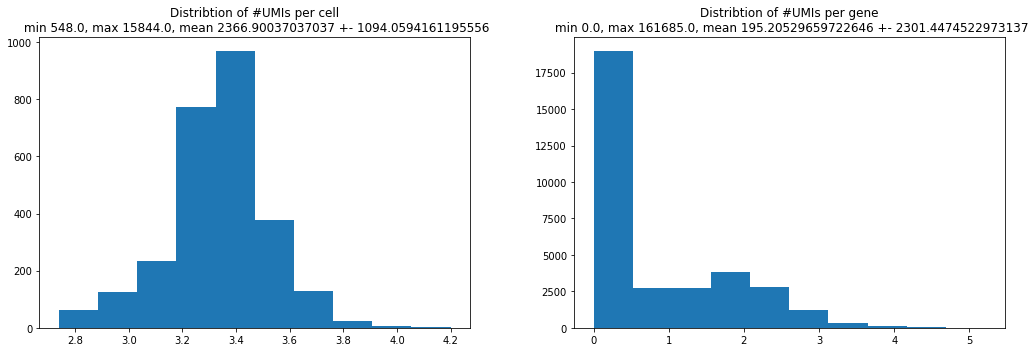

In [4]:
#solution
f, ax = plt.subplots(1,2,figsize=(15,5))
per_cell_sum = mat.sum(axis=1)
ax[0].hist(np.log10(per_cell_sum+1));
ax[0].set_title('Distribtion of #UMIs per cell\n min {}, max {}, mean {} +- {}'.format(min(per_cell_sum), 
                                                                               max(per_cell_sum), np.mean(per_cell_sum),
                                                                               np.std(per_cell_sum)));
per_gene_sum = mat.sum(axis=0)
ax[1].hist(np.log10(per_gene_sum+1));
ax[1].set_title('Distribtion of #UMIs per gene\n min {}, max {}, mean {} +- {}'.format(min(per_gene_sum), 
                                                                               max(per_gene_sum), np.mean(per_gene_sum),
                                                                               np.std(per_gene_sum)));
plt.tight_layout()


In [5]:
per_cell_sum

array([2421., 4903., 3149., ..., 1684., 1024., 1985.])

Уберем подозрительные клетки, для этого уберите клетки с суммарной экспрессией меньше, чем 250 и больше, чем 5000. Сколько клеток осталось?

In [6]:
#solution
low_cell_thr = 250
high_cell_thr = 5000
per_cell_sum = mat.sum(axis=1)
mask = (per_cell_sum >= low_cell_thr) & (per_cell_sum <= high_cell_thr) 
mat = mat[mask, :] 
barcodes = barcodes[mask]
print('New number of cells {}'.format(mat.shape[0]))

New number of cells 2631


Наш следующий этап - нормализация данных. Для этого поделите значения экспрессии каждой клетки на сумму экспрессий, умножьте на константу (10000) и возьмте логарифм. Сохраните новую матрицу в отдельной переменной. 
Магическое число 10000 тут больше для вычислительной стабильности, оно не несет какого то смысла. Формально это означает, что мы стандартизировали экспрессию кждой клетки - теперь все клетки экспрессируют 10000 РНК.

In [7]:
#solution
per_cell_sum = mat.sum(axis=1)
mat_norm = np.log(10000*mat/per_cell_sum[:,None]+1e-10)

In [8]:
annotation.head()

,ensemble_id,gene_symbol
0,ENSG00000243485,MIR1302-10
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,RP11-34P13.7
4,ENSG00000239945,RP11-34P13.8


Работать с таким количество признаков *достаточно* тяжело, поэтому поймем, какие гены нужно взять. Для этого сделаем довольно хитрую процедуру, используемую в одном известном пакете для анализа такого рода данных.  
1. Для этого посчитайте стандартное отклонение и среднее по "сырым" данным, отбросьте гены, где они равны нулю.  
2. Далее постройте линейную модель, где зависимая переменная  - стандартное отклонение гена, а предиктор - среднее значение экспрессии, постройте график с ними и регресионной прямой. Посчитайте "предсказанное отклонение" для каждого гена.  
3. Следующий этап - нормализация данных. Для этого из матрицы с сырыми данными вычтите среднее для каждого гена, поделите на std, но не посчитанное по данным, а на предсказанное моделью. Вы получите нормализованную версию таблицы. Если бы мы делили на посчитанное std, то в этой нормализованной версии таблицы std каждого гена было бы равно 1. Тут же это не так.   
4. Посчитайте std каждого гена в нормализованной версии, постройте график, где Х это логарифм средней экспрессии, У - посчитанное отклонение.   
5. Отсортируйте гены по этом отклонению, выберите первые 2000. Что можно сказать про их изначальное std и предсказанное моделью?   

Что мы хотим тут найти, так это гены, которые значильно более вариабельны, чем можно было ожидать по их средней экспрессии. Мы ожидаем, что именно такие гены будут нести информацию. Ведь если задуматься, нам не нужны гены, которые экспрессируются на одном уровне по всех клетках - они не помогут нам разделить кластеры.   

Дла этого задания вам возможно понадобится функции linregress, plt.scatter, DataFrame.sort_values и np.where

In [9]:
#solution p.1
gene_std = mat.std(axis=0)
gene_mean = mat.mean(axis=0)
dt = pd.DataFrame({'std':gene_std,'mean':gene_mean,'gene_id':annotation['ensemble_id']})
dt = dt.loc[(dt['std']!=0) & (dt['mean']!=0),:]
new_idx = [np.where(annotation.ensemble_id==x)[0][0] for x in dt.gene_id]
mat = mat[:,new_idx]
mat_norm = mat_norm[:,new_idx]
annotation = annotation.loc[new_idx,:]
annotation.reset_index(drop=True,inplace=True)

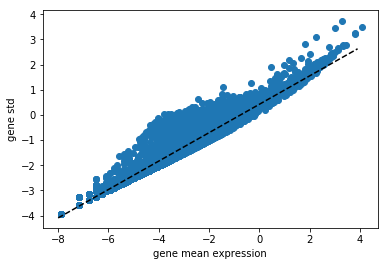

In [10]:
#solution p.2
slope, intercept, r_value, p_value, std_err = linregress(x=np.log(dt.loc[:,'mean'].values+1e-10),
                                                         y = np.log(dt.loc[:,'std',].values+1e-10))
regression_line = np.arange(-8, 4, 0.1)*slope + intercept
dt.loc[:,'predicted_std'] = dt['mean']*slope + intercept
plt.scatter(np.log(dt['mean']+1e-10), np.log(dt['std']+1e-10));
plt.plot(np.arange(-8, 4, 0.1), regression_line, '--', c='k')
plt.xlabel("gene mean expression");
plt.ylabel("gene std");

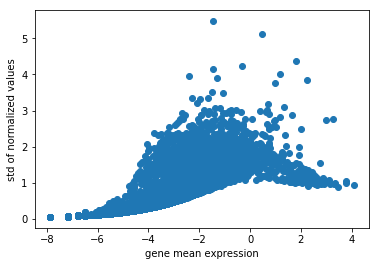

In [11]:
mat_custom_scale = (mat - mat.mean(axis=0))/(dt['predicted_std'].values[None,:])
plt.scatter(np.log(dt['mean']+1e-10),mat_custom_scale.std(axis=0));
plt.xlabel("gene mean expression");
plt.ylabel("std of normalized values");
dt.loc[:,'norm_val_std'] = mat_custom_scale.std(axis=0)

In [12]:
dt.sort_values('norm_val_std',ascending=False, inplace=True)
selected_genes = dt.gene_id.values[:2000]
new_idx = [np.where(annotation.ensemble_id==x)[0][0] for x in selected_genes]
mat = mat[:,new_idx]
mat_norm = mat_norm[:,new_idx]
annotation = annotation.loc[new_idx,:]
annotation.reset_index(drop=True,inplace=True)

In [13]:
annotation.head()

,ensemble_id,gene_symbol
0,ENSG00000163736,PPBP
1,ENSG00000115523,GNLY
2,ENSG00000163220,S100A9
3,ENSG00000100453,GZMB
4,ENSG00000254709,IGLL5


In [14]:
dt.head()

,std,mean,gene_id,predicted_std,norm_val_std
7696,3.055417,0.235652,ENSG00000163736,0.557327,5.482273
4046,6.805339,1.601672,ENSG00000115523,1.328904,5.121017
1955,16.734608,6.039529,ENSG00000163220,3.835563,4.363012
22589,3.522475,0.722919,ENSG00000100453,0.832553,4.230935
31682,2.300473,0.228430,ENSG00000254709,0.553248,4.158125


Теперь, когда мы нашли гены, которые потенциально несут много информации, нужно отмасштабировать данные, тут все просто, стандартное z-score transformation. Важный момент, масштабируем мы нормализованную версию (где умножали на 10000 и логарифмировали). 

In [15]:
#solution
mat_norm_scled = scale(mat_norm)

Следующий этап - понижение размерности с помощью PCA. А как можно выбрать оптимальное количество компонент?  
Для этого сделаем следующие шаги.  
1. Воспользуйтесь функцией PCA из scikit-learn, у нее есть методы fit и transform. Обучите на шкалированных данных и трансформируйте их же.   
2. Постройте пропорцию объясненной варации (explained_varuance_ratio_) и посмотрите, выходит ли она на плато - это и можно использовать как отсечку для числа "нужных" компонент

Несмотря на то, что мы отобрали крайне вариабельные гены, они вполне могут быть скоррелированны, поэтому мы хотим найти новые "координаты", которых меньше, но которые почти так же хорошо описывают наши данные. 

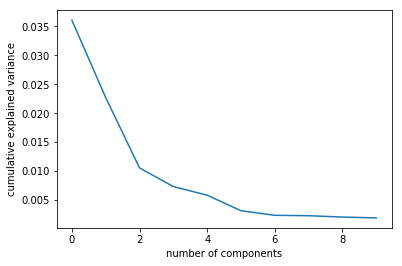

In [16]:
#solution
pca = PCA(n_components=0.99)
pca.fit(mat_norm_scled)
mat_norm_scled_pca  = pca.transform(mat_norm_scled)
plt.plot(pca.explained_variance_ratio_[:10])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [17]:
pca = PCA(n_components=7)
pca.fit(mat_norm_scled)
mat_norm_scled_pca  = pca.transform(mat_norm_scled)

Интересный этап - ембеддинг в двумерное пространство. Для этого воспользуемся UMAP с параметрами n_neighbors=25, min_dist=0.5, learning_rate=0.5, metric='euclidean' и его методом fit_transform. Отобразите данные, полученные после PCA, в двумерное пространство и нанесите на график проекции клеток с помощью plt.scatter.

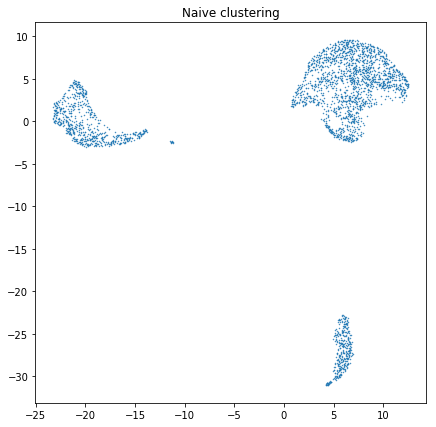

In [18]:
#solution
embedding = umap.UMAP(n_neighbors=25,
                      min_dist=0.5, learning_rate=0.5,
                      metric='euclidean').fit_transform(mat_norm_scled_pca)
plt.figure(figsize=(7,7))
plt.scatter(embedding[:,0],embedding[:,1],  s=0.2);
plt.title('Naive clustering');                    

Займемся кластеризацией клеток. Кластеризовать будем в выбранном пространстве после pca, наносить на двумерное пространство после umap. Чтобы попробовать различные кластеризации, воспользуемся [примером](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) scikit-learn и прогоним все возможные алгоритмы.
Так как у нас никакой информации, как должны выглядеть кластеры, то попробуем разные методы и посмотрим, как выглядит кластеризация. Сохраните предсказанные лейблы от каждого метода кластеризации. 

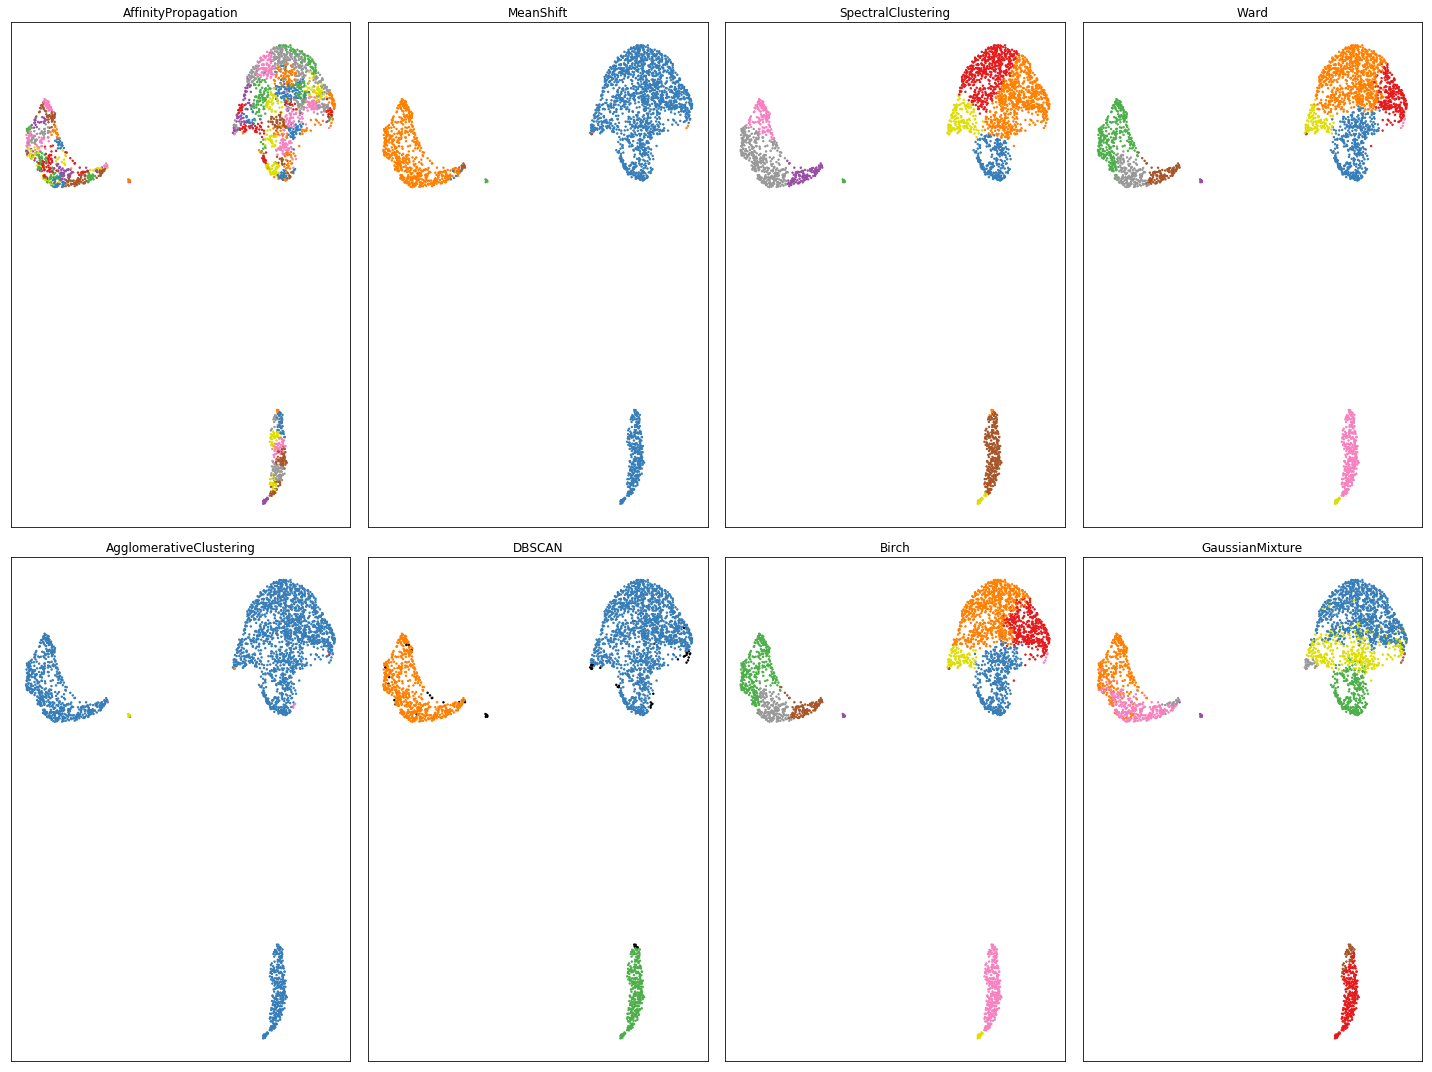

In [19]:
#solution
#parametrs
params = {'quantile': .2,
          'eps': 5,
          'damping': .5,
          'preference': -100,
          'n_neighbors': 30,
          'n_clusters': 9,
          'min_samples': 15}
predicted_labels = []
bandwidth = cluster.estimate_bandwidth(mat_norm_scled_pca, quantile=params['quantile'])
connectivity = kneighbors_graph(
        mat_norm_scled_pca, n_neighbors=params['n_neighbors'], include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
#clustering 
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'],min_samples=params['min_samples'], algorithm='kd_tree')
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
clustering_algorithms = (
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('Birch', birch),
    ('GaussianMixture', gmm))
#now plot everything
f, ax = plt.subplots(2, 4, figsize=(20,15))
for idx, (name, algorithm) in enumerate(clustering_algorithms):
    algorithm.fit(mat_norm_scled_pca)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(mat_norm_scled_pca)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    ax[idx//4, idx%4].scatter(embedding[:, 0], embedding[:, 1], s=2, color=colors[y_pred])
    #ax[idx//4, idx%4].xlim(-2.5, 2.5)
    #ax[idx//4, idx%4].ylim(-2.5, 2.5)
    ax[idx//4, idx%4].set_xticks(())
    ax[idx//4, idx%4].set_yticks(())
    ax[idx//4, idx%4].set_title(name)
    predicted_labels.append(y_pred)
plt.tight_layout()
predicted_labels = dict(zip([x[0] for x in clustering_algorithms], predicted_labels))

Сложно говорить о кластеризации, потому что правильного ответа, какие кластеры есть в данных, зачастую нет. Но тут мы можем воспользоваться знаниями из биологии - мы знаем маркеры для биологических кластеров, то есть для клеток, которые физически и биологически выполняют разные функции. Для этого давайте визуализируем некоторые из маркеров на 2D графике. Для этого ниже указаны гены, которы нужно вызуализировать. Для этого используйте plt.scatter, где в качестве параметра c предайте нужный столбец из нормализованных данных. 

In [20]:
features = ["MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP", "CD8A"]
feature_idx = [np.where(annotation.gene_symbol==feature)[0][0] for feature in features]

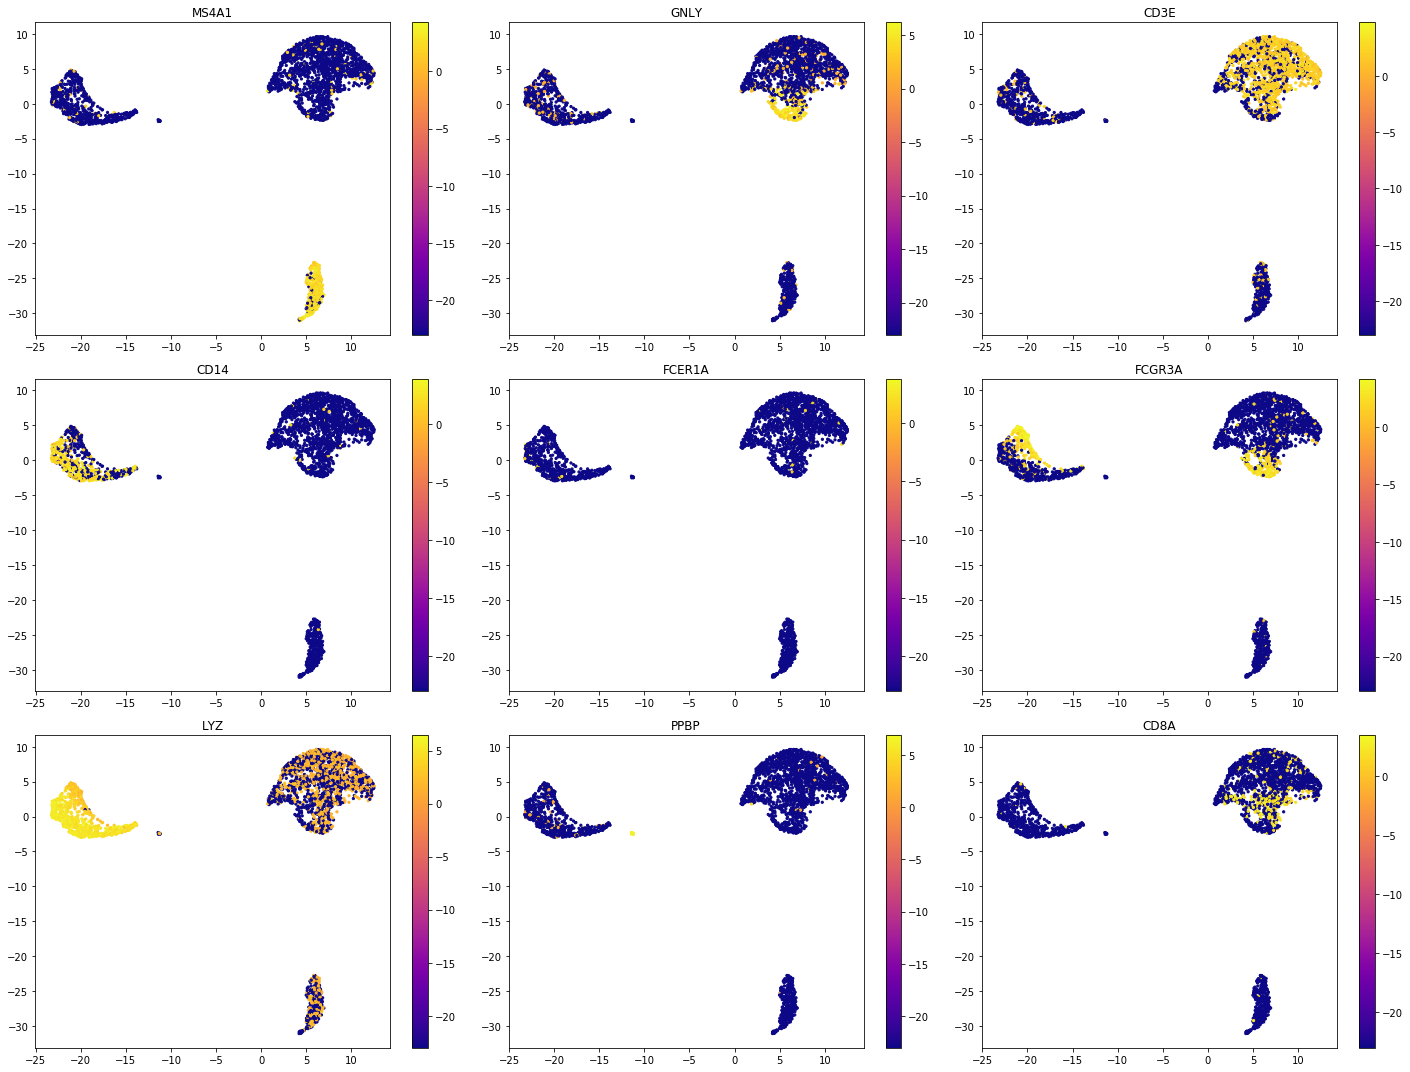

In [21]:
#solution
f, ax = plt.subplots(3, 3, figsize=(20,15))
for idx, feature_name in enumerate(features):
    im = ax[idx//3, idx%3].scatter(embedding[:, 0], embedding[:, 1], s=5, c=mat_norm[:,feature_idx[idx]], cmap='plasma')
    ax[idx//3, idx%3].set_title(feature_name)
    plt.colorbar(im, ax=ax[idx//3, idx%3])
plt.tight_layout()
plt.show()

Сравните результаты с аналогичным [анализом](https://satijalab.org/seurat/v3.0/pbmc3k_tutorial.html), сделанным с помощью одного из самых популярных пакетов. Насколько общая картина кластеризации и распределении экспресии генов похожа? Для данного датасета известны канонические маркеры биологических типов клеток. Для выбранного метода кластеризации постройте boxplots этих генов и проверьте, имеют ли биологический смысл кластеры, которые мы получили. Например, если будет только один кластер, который экспрессирует MS4A1, это значит, что мы корректно выделили B cells, если будет только один кластер, который экспрессирует CD8A, это значит, что мы корректно выделили CD8+ T.
Для этого постройте для каждого кластера boxplot с его соответствующими генами. Вам понадобится функция sns.bolxplot с hue = gene

In [22]:
cluster_assignment = dict({'Memory CD4+':['IL7R', 'CCR7'],
                          'Naive CD4+ T' : ['IL7R', 'S100A4'],
                          'CD14+ Mono':['LYZ','CD14'],
                          'B':['MS4A1'],
                          'CD8+ T':['CD8A'],
                          'FCGR3A+ Mono':['FCGR3A','MS4A7'],
                          'NK':['GNLY','NKG7'],
                          'DC':['FCER1A','CST3'],
                          'Mk':['PPBP']})

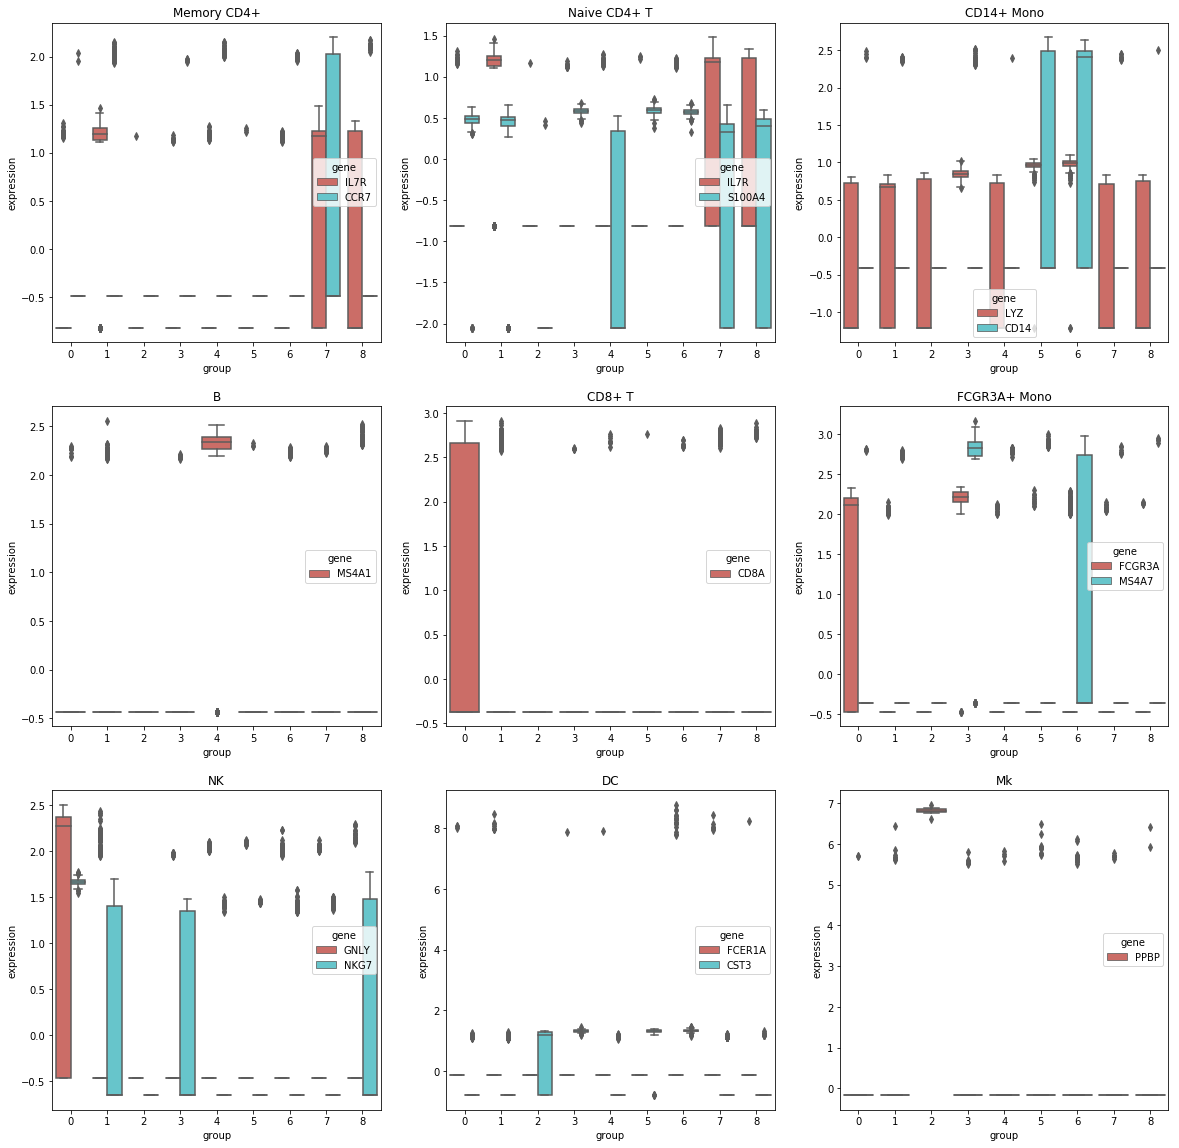

In [23]:
f, ax = plt.subplots(3, 3, figsize=(20,20))
for idx, cluster_name in enumerate(list(cluster_assignment.keys())):
    features = cluster_assignment[cluster_name]
    feature_idx = [np.where(annotation.gene_symbol==feature)[0][0] for feature in features]
    dt = pd.concat([pd.DataFrame({'expression':mat_norm_scled[:,feature_idx[x]],
                    'group':predicted_labels['SpectralClustering'],
                   'gene':features[x]}) for x in range(len(features))])
    sns.boxplot(x='group', y='expression',data=dt, hue='gene',
                ax=ax[idx//3, idx%3],
                palette=sns.hls_palette(2));
    ax[idx//3, idx%3].set_title(cluster_name)

Дополнительное задание для тех, кому интересно - попробуйте найти гены, которые экспрессируются дифференциально между кластерами. 